In [1]:
#Loading important libraries and functions
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, roc_auc_score

In [2]:
# Loading the dataset
data = pd.read_csv('parkinsons 2.csv')

In [3]:
#Retriving information regarding the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

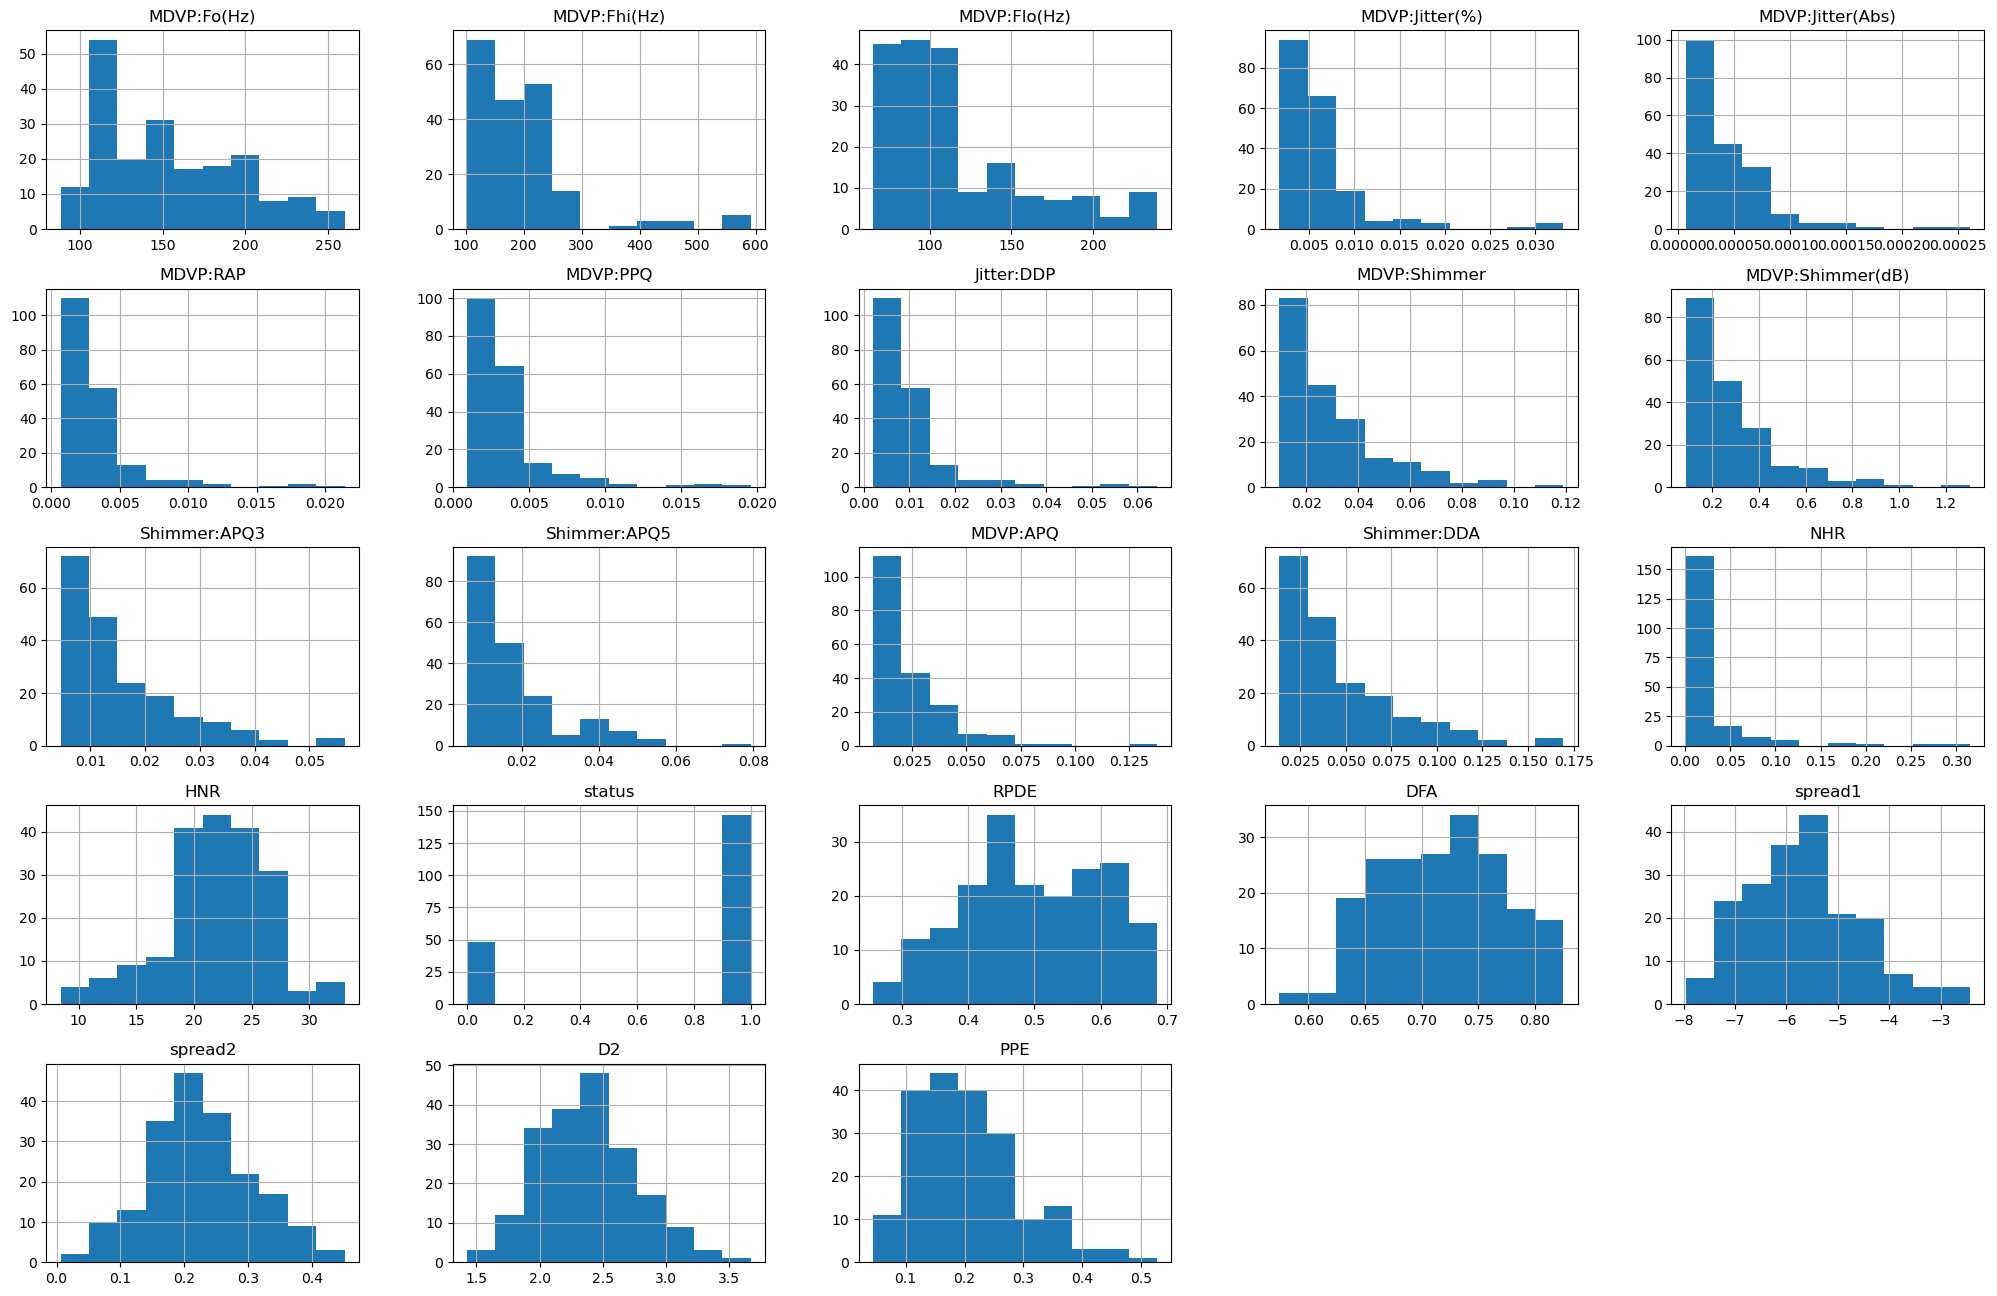

In [4]:
# plotting histogram of dataset
data.hist(figsize=(25,16))
plt.show()

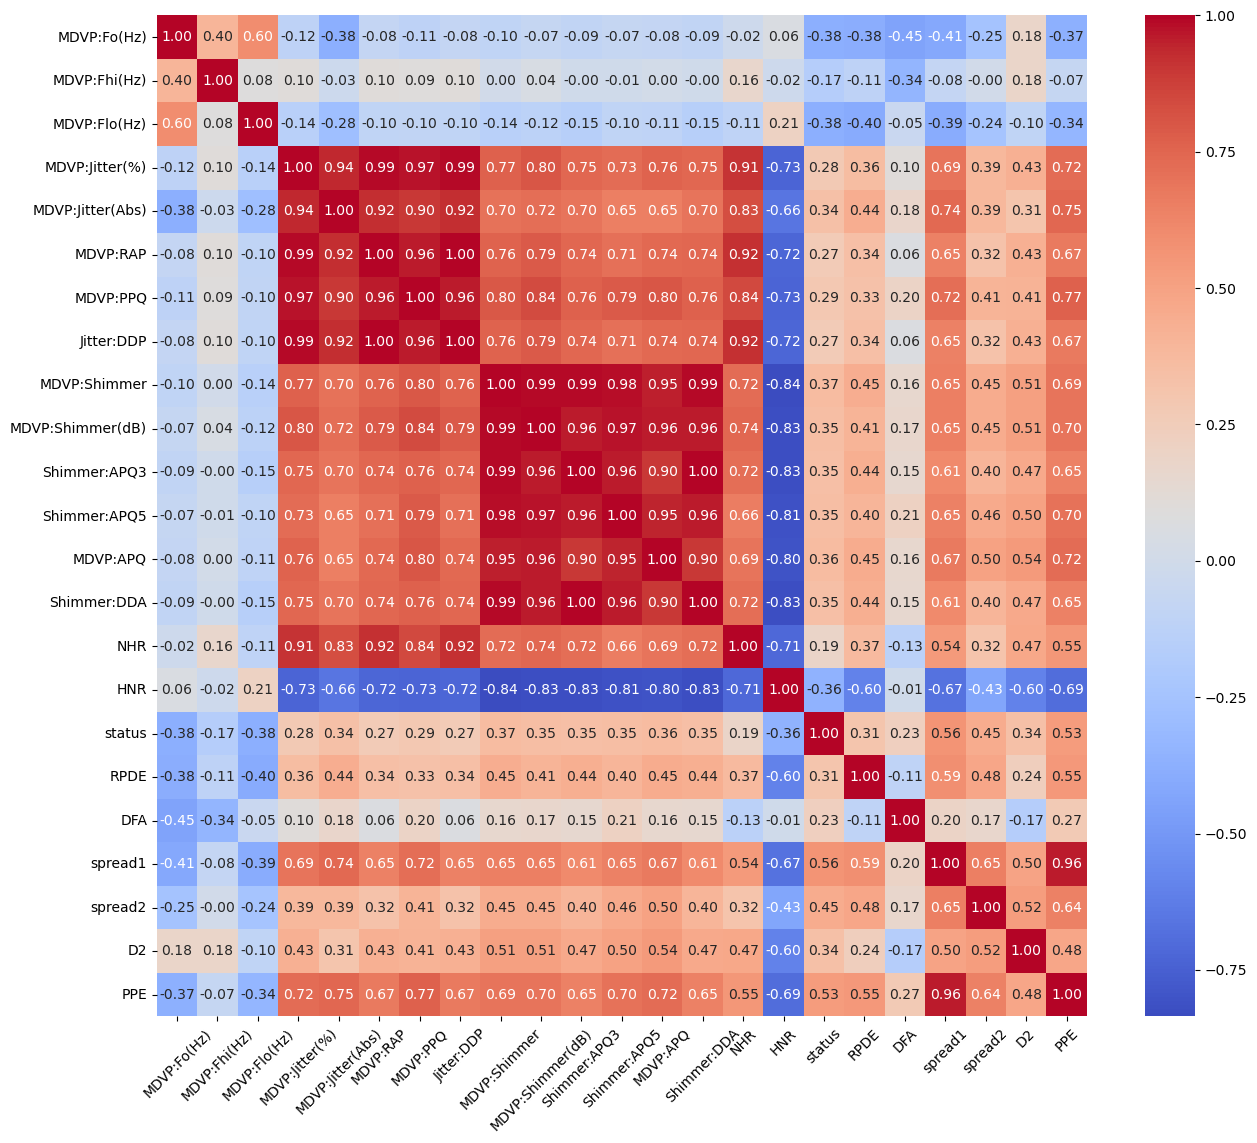

In [5]:
# Select only numeric columns for correlation calculation
numeric_columns = data.select_dtypes(include=np.number)
# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()
# Set the size of the heatmap
plt.figure(figsize=(15, 13))
# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
# Show the plot
plt.show()

In [6]:
from scipy import stats
# Select only numeric columns for correlation calculation
numeric_columns = data.select_dtypes(include=np.number)
print(numeric_columns)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [7]:
# Calculate z-scores
z_scores = stats.zscore(numeric_columns)
# Remove outliers
numeric_columns = numeric_columns[(z_scores > -3) & (z_scores < 3)] 
print("Values Eleminating after Z_score threshold") 
print(numeric_columns)

Values Eleminating after Z_score threshold
     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     

In [8]:
#Removing duplicate values
data.drop_duplicates(inplace=True)

In [9]:
#Checking for Null Values
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [10]:
#Getting an overview of the dataset
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [11]:
#No. of Rows and columns
data.shape

(195, 24)

In [12]:
#Counting number of records having PD and not having PD
data['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [13]:
#separating features and target values
X = data.drop(columns = ['name','status'],axis=1)
Y = data['status']

In [14]:
# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [15]:
# create XGBoost DMatrix for training and testing data
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [16]:
# set hyperparameters for XGBoost model
params = {
    "objective": "binary:logistic",
    "eval_metric": "error",
    "eta": 0.1,
    "max_depth": 6,
    "min_child_weight": 1,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "seed": 42
}

In [17]:
# train XGBoost model
num_rounds = 100
xgb_model = xgb.train(params, dtrain, num_rounds)
# make predictions on test data
y_pred = xgb_model.predict(dtest)
y_pred = [round(value) for value in y_pred]
# evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9487179487179487


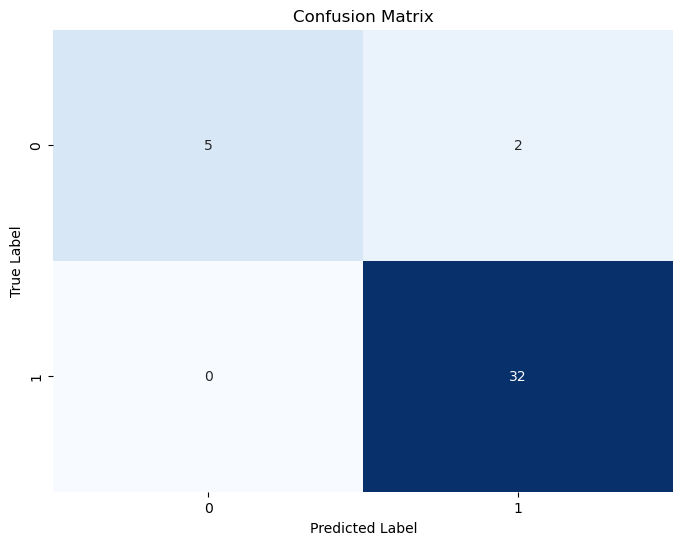

In [18]:

#Plotting the Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cmap = sns.diverging_palette(250, 10, as_cmap=True)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [19]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
# Define the feature names
feature_names = [
    "MDVP:Fo(Hz)",
    "MDVP:Fhi(Hz)",
    "MDVP:Flo(Hz)",
    "MDVP:Jitter(%)",
    "MDVP:Jitter(Abs)",
    "MDVP:RAP",
    "MDVP:PPQ",
    "Jitter:DDP",
    "MDVP:Shimmer",
    "MDVP:Shimmer(dB)",
    "Shimmer:APQ3",
    "Shimmer:APQ5",
    "MDVP:APQ",
    "Shimmer:DDA",
    "NHR",
    "HNR",
    "RPDE",
    "DFA",
    "spread1",
    "spread2",
    "D2",
    "PPE"
]

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



In [22]:
# Create an empty dictionary to store feature values
input_data = {}
# Prompt the user to enter each feature value
print("Enter the patients biomedical vocal measurements for \n Parkinson's Disease Prediction:")
for feature in feature_names:
    value = float(input(f"Enter {feature}: "))
    input_data[feature] = [value]  # Wrap the value in a list
# Create a DataFrame from the input data
input_df = pd.DataFrame(input_data)

# Create XGBoost DMatrix for input data
dinput = xgb.DMatrix(input_df)

# Make prediction on input data
y_pred = xgb_model.predict(dinput)
y_pred = [round(value) for value in y_pred]

print("")
print("Prediction result:", y_pred)
if(y_pred[0] == 0):
    print("Parkinson's Disease not found")
else:
    print("Parkinson's Disease found")

Enter the patients biomedical vocal measurements for 
 Parkinson's Disease Prediction:
Enter MDVP:Fo(Hz): 119.992
Enter MDVP:Fhi(Hz): 157.302
Enter MDVP:Flo(Hz): 74.99
Enter MDVP:Jitter(%): 0.00784
Enter MDVP:Jitter(Abs): 0.0007
Enter MDVP:RAP: 0.00370
Enter MDVP:PPQ: 0.00554
Enter Jitter:DDP: 0.01109
Enter MDVP:Shimmer: 0.04374
Enter MDVP:Shimmer(dB): 0.4260
Enter Shimmer:APQ3: 0.2182
Enter Shimmer:APQ5: 0.3130
Enter MDVP:APQ: 0.02971
Enter Shimmer:DDA: 0.065
Enter NHR: 0.022
Enter HNR: 21.03
Enter RPDE: 0.41
Enter DFA: 0.81
Enter spread1: -4.81
Enter spread2: 0.26
Enter D2: 2.3
Enter PPE: 0.28

Prediction result: [1]
Parkinson's Disease found
